In [15]:
import numpy as np
import pyaudio
import time
from pyldpc import make_ldpc, encode, decode, get_message
import matplotlib.pyplot as plt 

# Ses kayıt parametreleri
CHUNK = 512* 1
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100

# Taşıyıcı frekansı
tasiyici_frekans = 5000

# LDPC kodlama parametreleri
n = 32
d_v = 8
d_c = 16
snr = 20
H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
k = G.shape[1]
# PyAudio nesnesi oluştur
p = pyaudio.PyAudio()
# Çıkış akışını aç
stream = p.open(
format=FORMAT,
channels=CHANNELS,
rate=RATE,
output=True,
frames_per_buffer=CHUNK
    )
def ses_gonder(bits):
    # Veriyi genişlet (CHUNK uzunluğunda)
    genisletilmis_veri = np.repeat(bits, CHUNK // len(bits))

    # Taşıyıcı dalga oluşturma
    t = np.arange(0, len(genisletilmis_veri)) / RATE
    tasiyici_dalga = np.sin(2 * np.pi * tasiyici_frekans * t)

    # Frekans modülasyonu
    m = tasiyici_dalga * (genisletilmis_veri * 2 - 1)
    modüle_edilmis_dalga = m * 32767  # Ses cihazına uygun aralığa getir

    # Modüle edilmiş dalgayı ses cihazına gönderme
    stream.write(modüle_edilmis_dalga.astype(np.int16).tobytes())

def onluk_binarye_cevir(onluk_sayi):
  """Verilen onluk sayıyı 16 bitlik bir binary diziye çevirir.

  Args:
      onluk_sayi: Dönüştürülecek onluk sayı.

  Returns:
      16 bitlik binary dizi (liste).
  """
  binary_dizi = [int(bit) for bit in bin(onluk_sayi)[2:].zfill(16)]
  return binary_dizi


# Kullanım örneği:
v = np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,1], dtype=np.int16)
sayac=0
for j in range(300):
        v=onluk_binarye_cevir(j)
        sayac+=1
        ses_gonder(v)  # Veriyi ses olarak gönder      
        time.sleep(0.002)
# Akışı kapat
stream.stop_stream()
stream.close()
p.terminate()

ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'


In [170]:
onluk_binarye_cevir(8)

[0, 0, 0, 0, 1, 0, 0, 0]

print(len(sound_bits))


>>> import numpy as np
>>> from pyldpc import make_ldpc, encode, decode, get_message
>>> n = 32
>>> d_v = 4
>>> d_c = 8
>>> snr = 1000
>>> H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
>>> k = G.shape[1]
>>> v = np.random.randint(2, size=k)
>>> y = encode(G, v, snr)
>>> d = decode(H, y, snr)
>>> x = get_message(G, d)
>>> assert abs(x - v).sum() == 0

print(len(y))

print(len(v))

d = decode(H, y, 20)
x = get_message(G, d)
x


print(len(y))

y

aci = np.arcsin(0.5)  

In [19]:
modüle_edilmis_dalga

array([    -0.        , -21417.70013415, -32418.20922816, ...,
       -25324.60528974,  -5574.95445348,  16886.25575742])

In [20]:
m2=modüle_edilmis_dalga/32767

In [21]:
m2

array([-0.        , -0.65363628, -0.98935543, ..., -0.77286921,
       -0.1701393 ,  0.51534336])

In [22]:
t = np.arange(0, 2048) / RATE
tasiyici_dalga = np.sin(2 * np.pi * 5000 * t)
tasiyici_dalga=np.where(tasiyici_dalga==0,1e-10,tasiyici_dalga)




In [26]:
genis_veri=(m2/tasiyici_dalga +1)/2
genis_veri=np.where(genis_veri <=0,-1,genis_veri)


In [30]:
a=al(genis_veri)

a


array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [32]:
def al(data):
	n = 32
	d_v = 4
	d_c = 8
	snr = 20
	H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
	gruplar = [data[i:i+64] for i in range(0, len(data), 64)]
	ana_ort=np.abs(np.mean(data))
	ortalamalar =[]
	
	for grup in gruplar:
		ortalama=np.mean(grup)
		if ortalama <=0:
			ortalamalar.append(ortalama)
		else:
			ortalamalar.append(ortalama)
	ortalamalar=np.array(ortalamalar)	
	#print(ortalamalar[0])	
	d = decode(H, ortalamalar, snr)
	x=get_message(G, d)
			
	return x

In [161]:

bits =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,0]
tasiyici_frekans = 2000

In [164]:

# Veriyi genişlet (CHUNK uzunluğunda)
genisletilmis_veri = np.repeat(bits, 512 // len(bits))
veri_s=np.sin(2*np.pi*genisletilmis_veri*t)
# Taşıyıcı dalga oluşturma
t = np.arange(0, len(genisletilmis_veri)) / RATE
sinyal = np.sin(2 * np.pi * tasiyici_frekans * t)

m = tasiyici_dalga * (genisletilmis_veri *t-1)


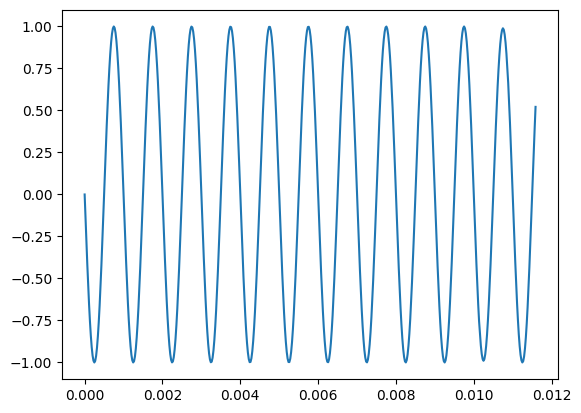

In [165]:
plt.plot(t,m)

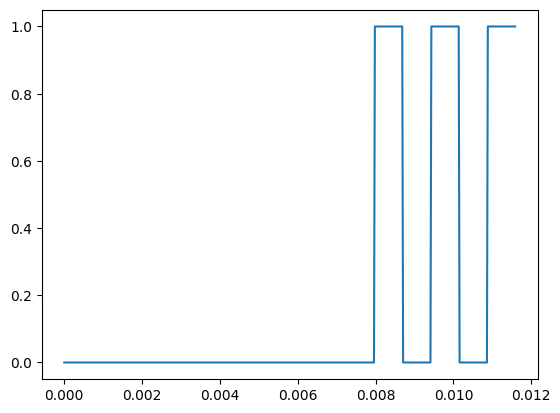

In [118]:
plt.plot(t,genisletilmis_veri)

In [87]:
genisletilmis_veri

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,